# Importing

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Getting the dataframe and doing some researches

In [3]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
clean_train = train.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
clean_test = test.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [6]:
clean_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [7]:
clean_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

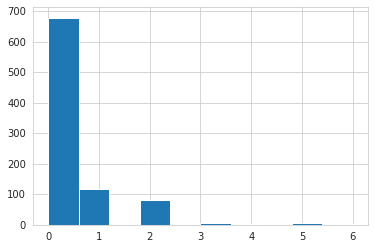

In [ ]:
sns.set_style('whitegrid')
plt.hist(data=clean_train, x = 'Parch')

# Transforming column sex with get dummies

In [8]:
sex_train = pd.get_dummies(clean_train['Sex'], drop_first=True)
sex_train.head()

,male
0,1
1,0
2,0
3,0
4,1


In [9]:
sex_test = pd.get_dummies(clean_test['Sex'], drop_first=True)
sex_test.head()

,male
0,1
1,0
2,1
3,1
4,0


In [10]:
clean_train = pd.concat([clean_train, sex_train], axis=1)
clean_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,male
0,1,0,3,male,22.0,1,0,7.2500,1
1,2,1,1,female,38.0,1,0,71.2833,0
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,1


In [11]:
clean_train = clean_train.drop('Sex', axis=1)
clean_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [12]:
clean_test = pd.concat([clean_test, sex_test], axis=1)
clean_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,male
0,892,3,male,34.5,0,0,7.8292,1
1,893,3,female,47.0,1,0,7.0000,0
2,894,2,male,62.0,0,0,9.6875,1
3,895,3,male,27.0,0,0,8.6625,1
4,896,3,female,22.0,1,1,12.2875,0


In [13]:
clean_test = clean_test.drop('Sex', axis=1)
clean_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male
0,892,3,34.5,0,0,7.8292,1
1,893,3,47.0,1,0,7.0000,0
2,894,2,62.0,0,0,9.6875,1
3,895,3,27.0,0,0,8.6625,1
4,896,3,22.0,1,1,12.2875,0


# Checking missing data

In [ ]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   male         891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 49.7 KB


De 891 valores totais, só temos 714 campos de idade (177 valores nulos que devem ser corrigidos)

In [14]:
clean_train['Age'].isnull().sort_values(ascending=False).head(10)

643    True
517    True
502    True
507    True
140    True
718    True
306    True
511    True
304    True
303    True
Name: Age, dtype: bool

Esses valores serão preenchidos pela média das idades que nós já possuimos

In [15]:
clean_train['Age'].fillna(clean_train['Age'].mean(), inplace=True)

In [16]:
clean_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
dtype: int64

In [17]:
clean_test.isnull().sum()

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
male            0
dtype: int64

In [18]:
clean_test['Age'].fillna(clean_test['Age'].mean(), inplace=True)
clean_test['Fare'].fillna(clean_test['Fare'].mean(), inplace=True)

In [19]:
clean_test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
dtype: int64

# Modelo de Regressão Logística

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [23]:
clean_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [24]:
X = clean_train.drop('Survived', axis=1)
y = clean_train['Survived']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=77)

In [26]:
lr = LogisticRegression()

In [27]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
lr_pred = lr.predict(X_test)

In [29]:
lr_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [31]:
print(confusion_matrix(y_test, lr_pred))

[[159  18]
 [ 27  64]]


In [32]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       177
           1       0.78      0.70      0.74        91

    accuracy                           0.83       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.83      0.83      0.83       268



In [33]:
print(accuracy_score(y_test, lr_pred))

0.832089552238806


# Submetendo os resultados

In [34]:
lr.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
clean_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [36]:
clean_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male
0,892,3,34.5,0,0,7.8292,1
1,893,3,47.0,1,0,7.0000,0
2,894,2,62.0,0,0,9.6875,1
3,895,3,27.0,0,0,8.6625,1
4,896,3,22.0,1,1,12.2875,0


In [37]:
results = lr.predict(clean_test)
results

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [38]:
submission = pd.DataFrame()
submission['PassengerId'] = clean_test['PassengerId']
submission['Survived'] = results

In [39]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [40]:
submission.to_csv('submission.csv', index=False)